<a href="https://colab.research.google.com/github/alexschwartzburg/Energy_Use_USA/blob/master/Analysis_of_Net_Energy_Consumption_USA_source_EIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examining net energy usage in the USA

The U.S. Energy Information Administration is a government agency that "…collects, analyzes, and disseminates independent and impartial energy information to promote sound policymaking, efficient markets, and public understanding of energy and its interaction with the economy and the environment."  You can read more about them here: https://www.eia.gov/about/.




## SCOPE

In the modern world today the majority of human activity and habitation is enabled by the production and consumption of energy in one form or another.  There is a diversity of perspectives on this fact, but it is a fact.  Environmentalists may think it's a bad thing.  Energy companies may think it’s a profit opportunity.  However, all of these people whenever they get cold or hot, hungry or thirsty, will, guaranteed, use some form of energy to optimize their state of being.

As a social scientist, I am interested in the relationship between energy production and other quantifiable variables.  Notably, I am interested in what energy production/consumption can predict about other trends in society.  
* Does a boost in energy production/consumption correspond to increased economic activity?  
* When a state produces more energy does the cost of real estate go up?
* Etc.

A critical first step to investigating these questions is to identify anomalous patterns in the data: Are there some states in which the energy trends are out of step with the rest of the country?

This first step is the purpose of this project.  We will leverage Python and some libraries (pandas, numpy, matplotlib) to plot all of the trends for each state using EIA's Net Production All Sectors data going back twenty years.  While annual and monthly data are available, this data is collected/presented quarterly.

## Data

As usual we import the modules we'll be working with.  Numpy, pandas, matplotlib, and seaborn.  We also pull in our data and tell python to print a summary using the ```.info()``` function in pandas.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

data = pd.read_csv('https://raw.githubusercontent.com/alexschwartzburg/Energy_Use_USA/master/Combined2.csv')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 3 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   State                                                 4712 non-null   object 
 1   Quarter                                               4712 non-null   object 
 2   Net Energy Generation in thousands of Kilowatt Hours  4712 non-null   float64
dtypes: float64(1), object(2)
memory usage: 110.6+ KB


As we can see there are three columns, State, Quarter, and the Net Energy Generation in thousands of Kilowatt Hours.  Since this is univariate time series data, this is to be expected.

Let's investigate!

In [58]:
data['State'].unique(), len(data['State'].unique())

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'ENC', 'ESC',
        'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
        'MAT', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'MTN', 'NC', 'ND',
        'NE', 'NEW', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
        'PCC', 'PCN', 'RI', 'SAT', 'SC', 'SD', 'TN', 'TX', 'US', 'UT',
        'VA', 'VT', 'WA', 'WI', 'WNC', 'WSC', 'WV', 'WY'], dtype=object), 62)

I would appear that there are 62 values for 'State'.  That's too many.  Let's split them into states and non-state values.

In [59]:
data['State'].unique()
states = []
regions = []
specials = []

for x in data['State'].unique():
  if x in specials:
    regions.append(x)
  elif len(str(x)) == 2:
    states.append(x)
  elif len(str(x)) == 3:
    regions.append(x)

states_sorted = sorted(states)

print (states_sorted)
print (regions)
len(states)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
['ENC', 'ESC', 'MAT', 'MTN', 'NEW', 'PCC', 'PCN', 'SAT', 'WNC', 'WSC']


52

Woops! Still 2 too many. Let's just eyeball it and dump them into specials.  'DC' isn't a state, and 'US' isn't a state either.

In [60]:
data['State'].unique()
states = []
regions = []
specials = ['DC','US']

for x in data['State'].unique():
  if x in specials:
    regions.append(x)
  elif len(str(x)) == 2:
    states.append(x)
  elif len(str(x)) == 3:
    regions.append(x)

states_sorted = sorted(states)

print (states_sorted)
print (regions)
len(states)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
['DC', 'ENC', 'ESC', 'MAT', 'MTN', 'NEW', 'PCC', 'PCN', 'SAT', 'US', 'WNC', 'WSC']


50

Good! 50 states and some regions.  Let's just dump the names of those regions into a list and make a dictionary out of it in case we need it later.

In [61]:
a = ['South_Atlantic','West_South_Central','West_North_Central','United_States','Pacific_Noncontiguous','Pacific_Contiguous','East_North_Central','East_South_Central','District_Of_Columbia','Middle_Atlantic','Mountain','New_England']
sorted(a)

b = regions
region_dict = dict(zip(sorted(b),sorted(a)))
region_dict

{'DC': 'District_Of_Columbia',
 'ENC': 'East_North_Central',
 'ESC': 'East_South_Central',
 'MAT': 'Middle_Atlantic',
 'MTN': 'Mountain',
 'NEW': 'New_England',
 'PCC': 'Pacific_Contiguous',
 'PCN': 'Pacific_Noncontiguous',
 'SAT': 'South_Atlantic',
 'US': 'United_States',
 'WNC': 'West_North_Central',
 'WSC': 'West_South_Central'}

## Analysis

In [0]:
data.head()
data.groupby('State').groups

y = [] 

for x in states_sorted[0:5]:
  data.groupby('State').get_group(x).set_index('Quarter').plot.line()

# plts = data2.groupby('State').get_group('TX').set_index('Quarter').plot.line() 
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 6))
# .set_title(self, 'TX', fontdict=None, loc=None, pad=None)
#here's plt.subplots come into play ; look at data viz lecture notes


## Defining our function to plot our graphs

In [0]:
# Define a function to plot the graphs
def plot_state(x, data):
  y1 = data.groupby('State').get_group(x).set_index('Quarter').plot.line()
  y2 = plt.title(x)
  return (y1, y2)



 Ideally at this point I would have defined a function to present the graphs as 2 x 2 blocks, but will have to be a challange for another day.

In [0]:
def two_by_two(X):
  pass
  #stuff would have gone here.

List1 = []
X = []
for x in states_sorted[0:4]:
  List1.append(plot_state(x, data))
  X.append(x)
 
two_by_two(List1,  X)

## Code Gen

The obvious way to plot all of these graphs is to dump them into a for loop.  However one wants to exercise caution not to over strain the CPU.  So what I like to do in situations like this is write some code to generate the text of code that I'm gonna run.

In [139]:
#Some quick code generation

x = [0, 4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]
y = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 50]
z = dict(zip(x,y))

# We will need code that looks like the code below for all 50 of the states.
#
# for x in states_sorted[0:4]:
#   plot_state(x, data)
#
# To create that we will use a for loop to create other for loops.

for X in x:
  print(f"for x in states_sorted[{X}:{z[X]}]:\n\tplot_state(x, data)")


for x in states_sorted[0:4]:
	plot_state(x, data)
for x in states_sorted[4:8]:
	plot_state(x, data)
for x in states_sorted[8:12]:
	plot_state(x, data)
for x in states_sorted[12:16]:
	plot_state(x, data)
for x in states_sorted[16:20]:
	plot_state(x, data)
for x in states_sorted[20:24]:
	plot_state(x, data)
for x in states_sorted[24:28]:
	plot_state(x, data)
for x in states_sorted[28:32]:
	plot_state(x, data)
for x in states_sorted[32:36]:
	plot_state(x, data)
for x in states_sorted[36:40]:
	plot_state(x, data)
for x in states_sorted[40:44]:
	plot_state(x, data)
for x in states_sorted[44:48]:
	plot_state(x, data)
for x in states_sorted[48:50]:
	plot_state(x, data)


## GRAPHS — BREAKING UP THE CODE:

We will now create code blocks with each one of these for loops.  The reason we do that is because that way we limit the stress on the CPU to only 5 charts each time.

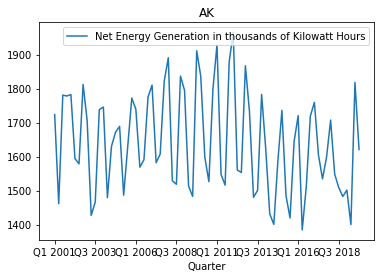

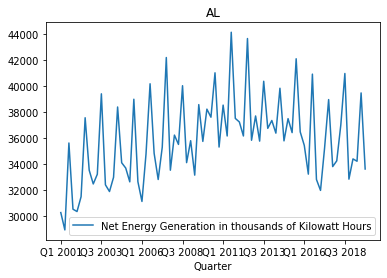

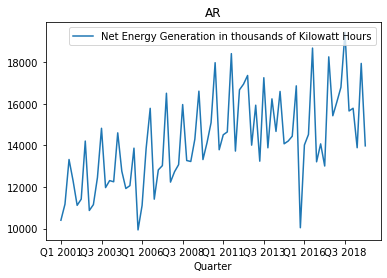

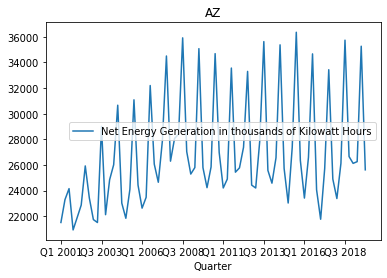

In [140]:
for x in states_sorted[0:4]:
	plot_state(x, data)


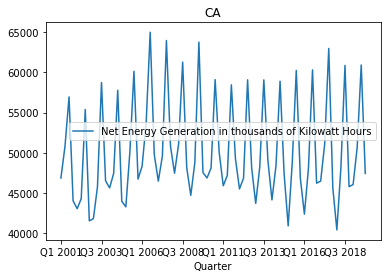

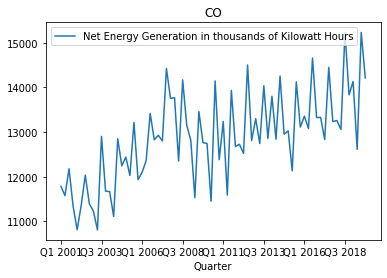

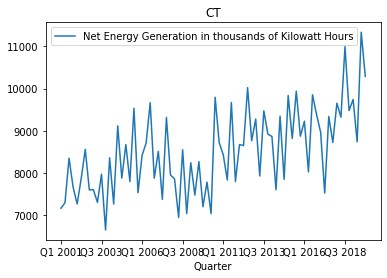

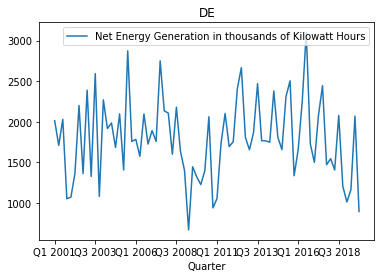

In [141]:
for x in states_sorted[4:8]:
	plot_state(x, data)


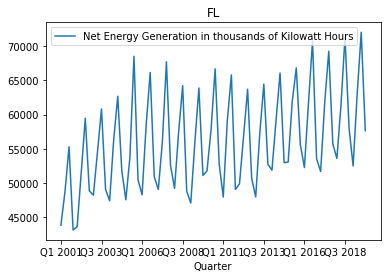

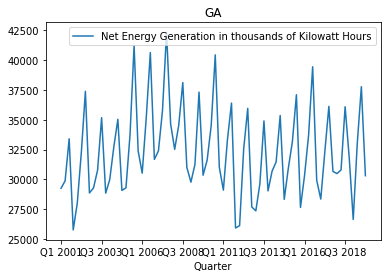

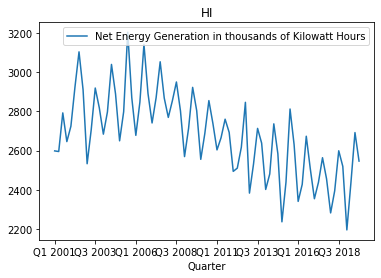

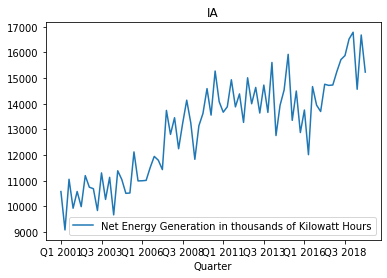

In [142]:
for x in states_sorted[8:12]:
	plot_state(x, data)


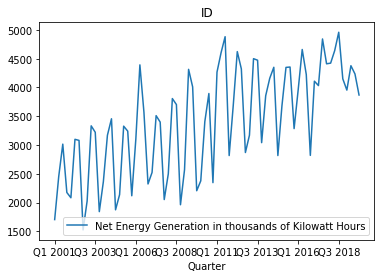

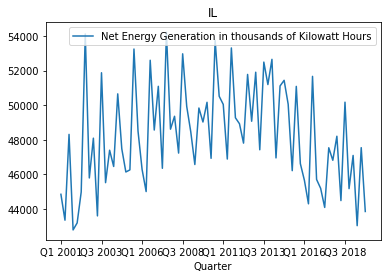

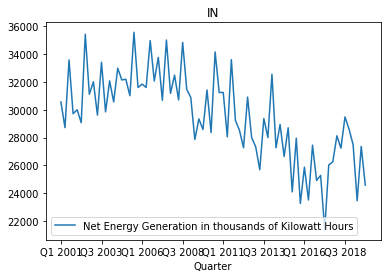

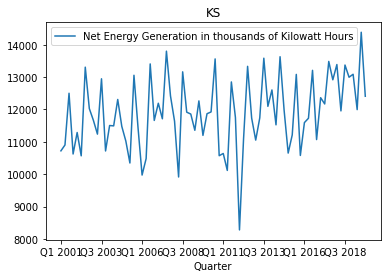

In [143]:
for x in states_sorted[12:16]:
	plot_state(x, data)


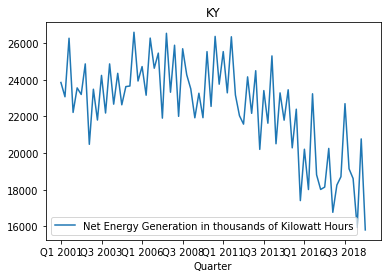

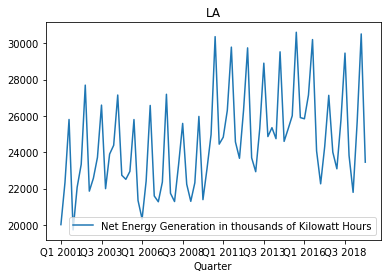

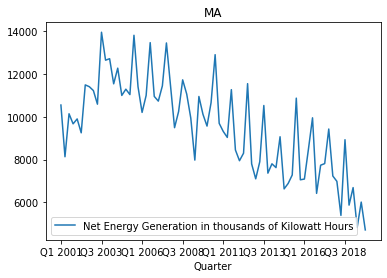

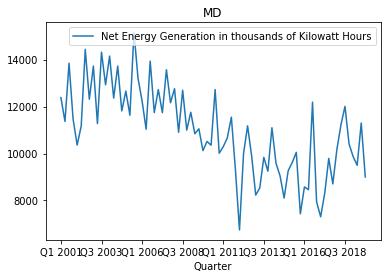

In [144]:
for x in states_sorted[16:20]:
	plot_state(x, data)


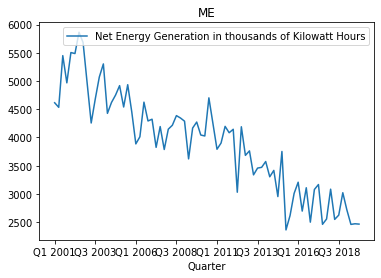

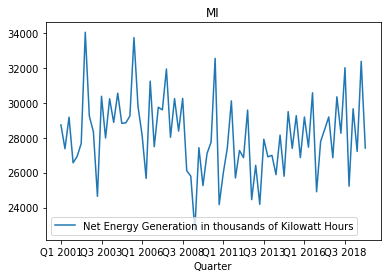

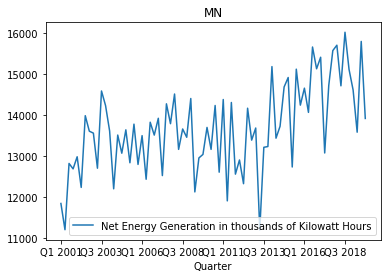

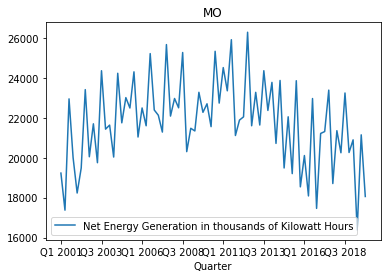

In [145]:
for x in states_sorted[20:24]:
	plot_state(x, data)


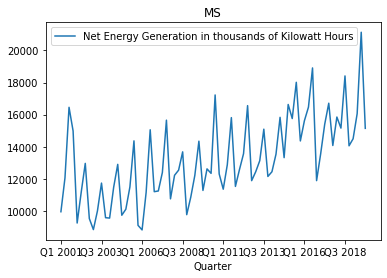

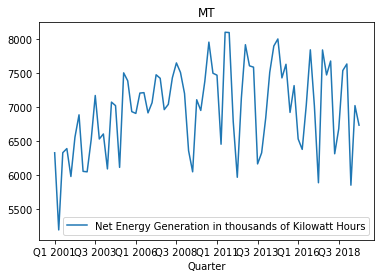

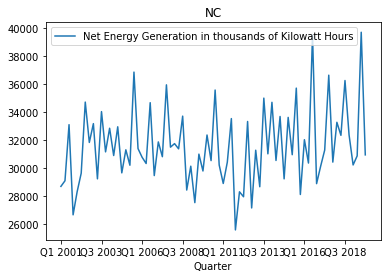

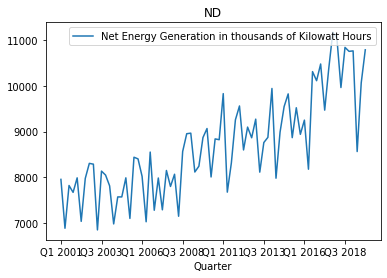

In [152]:
for x in states_sorted[24:28]:
	plot_state(x, data)


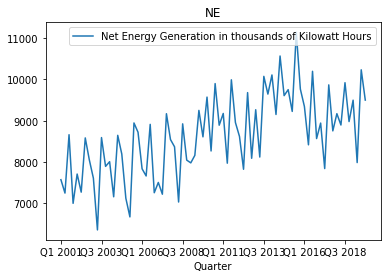

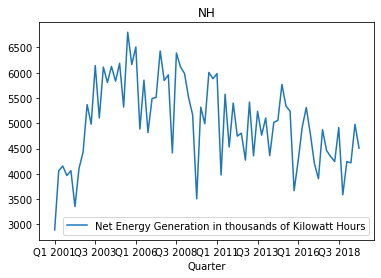

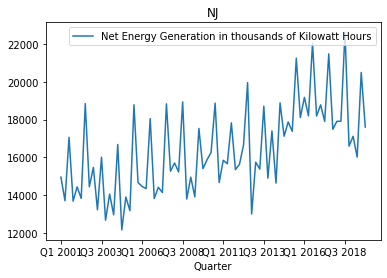

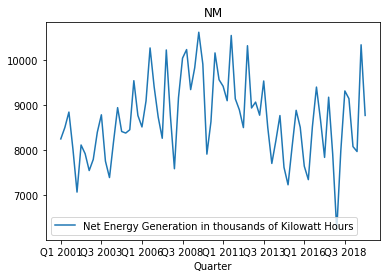

In [151]:
for x in states_sorted[28:32]:
	plot_state(x, data)


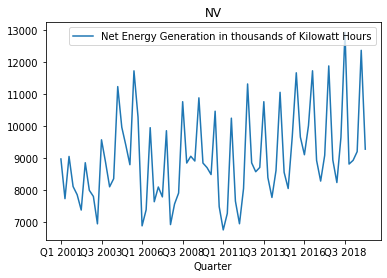

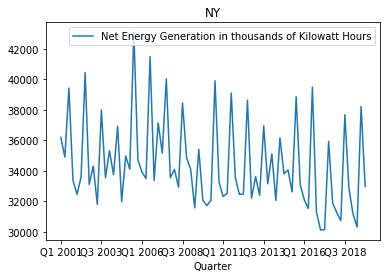

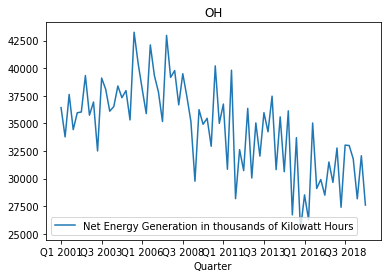

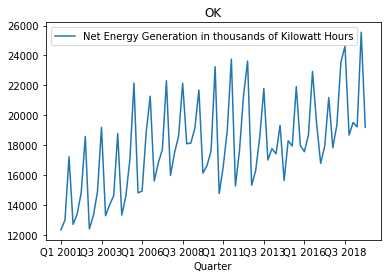

In [150]:
for x in states_sorted[32:36]:
	plot_state(x, data)


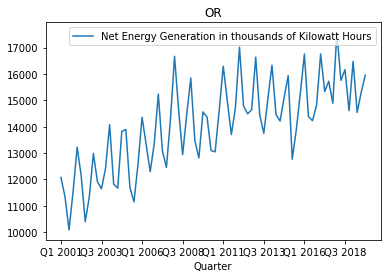

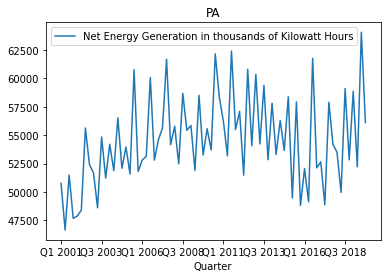

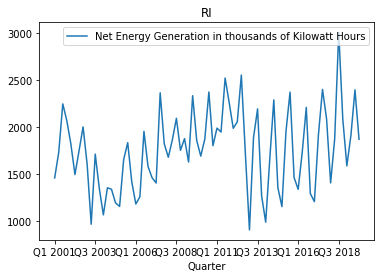

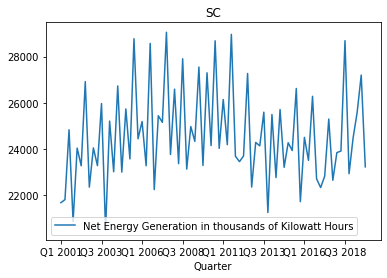

In [149]:
for x in states_sorted[36:40]:
	plot_state(x, data)


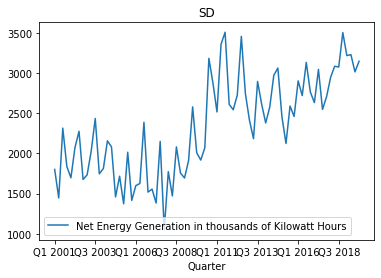

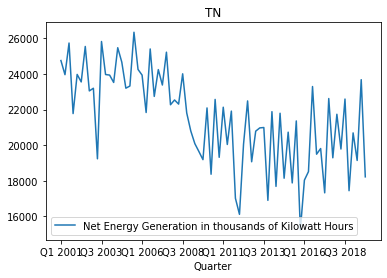

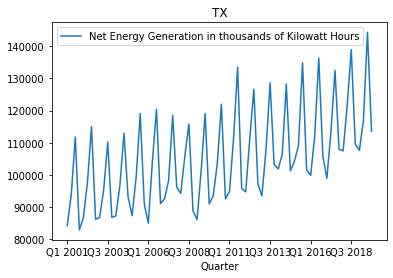

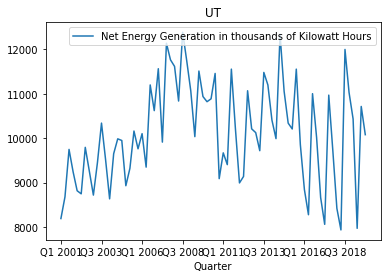

In [148]:
for x in states_sorted[40:44]:
	plot_state(x, data)


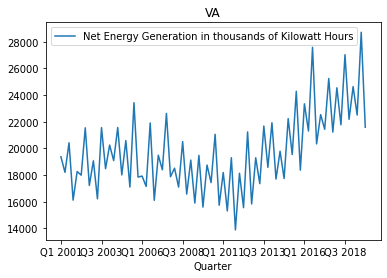

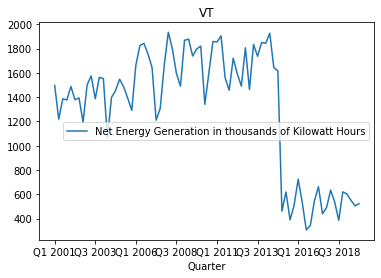

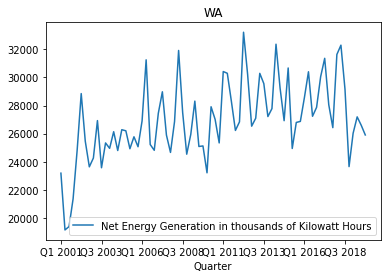

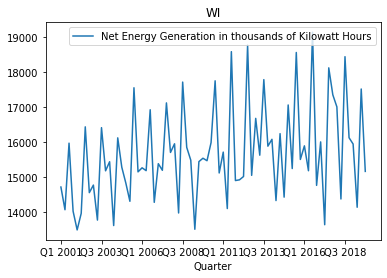

In [147]:
for x in states_sorted[44:48]:
	plot_state(x, data)


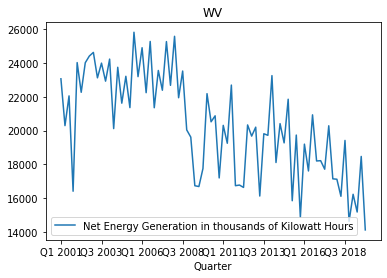

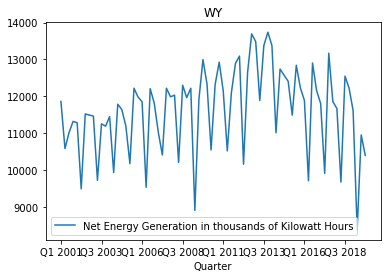

In [146]:
for x in states_sorted[48:50]:
	plot_state(x, data)
 

## Assessing the graphs

Now that we've output these graphs, the question remains as to whether they look interesting or not.  My method of doing this is by eyeballing.  You look at the graph and make a judgement.  That said, it would behoove us to separate the interesting and the boring graphs.  Which I do by using this code 

In [0]:
interesting = []
boring = []
states_sorted = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

for x in states_sorted:
    y = input(f'{x} - Interesting?… Y/N')
    if y == 'y':
        interesting.append(x)
    else:
        boring.append(x)

# I ran this code block in a separate shell on my laptop.


In [154]:
interesting = ['CO', 'CT', 'DE', 'HI', 'IA', 'ID', 'IN', 'KY', 'MA',\
               'MD', 'ME', 'MN', 'MO', 'MS', 'ND', 'NH', 'NJ', 'OH',\
               'OK', 'OR', 'RI', 'SD', 'TN', 'UT', 'VA', 'VT', 'WA',\
               'WV']
boring =  ['AK', 'AL', 'AR', 'AZ', 'CA', 'FL', 'GA',\
           'IL', 'KS', 'LA', 'MI', 'MT', 'NC', 'NE',\
           'NM', 'NV', 'NY', 'PA', 'SC', 'TX', 'WI',\
           'WY']
len(interesting) + len(boring)

50

And that's about it, the interesting ones are states where you might consider running due diligence.  Correlating the rise or fall in energy use with adjustments to cost of living, or home prices, or in an extreme case like vermont, examining why they had such a precipitious drop in energy. …

… Thanks for viewing!